<a href="https://colab.research.google.com/github/dominguezeloy/data_science_portfolio/blob/main/04_Machine_Learning_Casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Empiezo el proyecto, breve descripcion:
  - visualización del precio alquiler de Barcelona del 2014 al 2022 sobre plano.
  - cálculo del precio para 2023/2024.

In [1]:
# importo las librerias que necesito
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Buscamos el DataSet Barcelona en https://www.kaggle.com/ y añadimos a Colab el archivo Barcelona_rent_price.csv para importar con pandas

In [2]:
df_precios = pd.read_csv ('/content/Barcelona_rent_price.csv')
df_precios.shape #mostrar el numero de filas y columnas

(4622, 6)

analisis de datos para evaluar la informacion necesiaria

In [3]:
df_precios.dtypes #tipos de variables

Year               int64
Trimester          int64
District          object
Neighbourhood     object
Average _rent     object
Price            float64
dtype: object

Se usa el archivo anterior para llamada API Geocoding de Geoapify para obtener coordenadas de los barrios, para simplificar lo he guardado en otro archivo: Barcelona_coordenadas.csv

In [4]:
df_coordenadas = pd.read_csv ('/content/Barcelona_coordenadas.csv')
df_coordenadas.shape #mostrar el numero de filas y columnas

(68, 3)

analisis de datos para evaluar la informacion necesiaria

In [5]:
df_coordenadas.dtypes #tipos de variables

Neighbourhood     object
lat              float64
lon              float64
dtype: object

Juntamos los dos archivos CSV para trabajar con un unico DataFrame

In [6]:
# Cargar los archivos csv
df_precios = pd.read_csv("/content/Barcelona_rent_price.csv")
df_coordenadas = pd.read_csv("/content/Barcelona_coordenadas.csv")

# Unir los dataframes utilizando la columna en común (en este caso "Neighbourhood")
df_final = pd.merge(df_precios, df_coordenadas, on="Neighbourhood")

# Guardar el resultado en un nuevo archivo csv
df_final.to_csv("precios_con_coordenadas.csv", index=False)

Comprobamos la union de los DataFrames

In [7]:
df_final.shape #mostrar el numero de filas y columnas

(4530, 8)

In [8]:
df_final.dtypes #tipos de variables

Year               int64
Trimester          int64
District          object
Neighbourhood     object
Average _rent     object
Price            float64
lat              float64
lon              float64
dtype: object

graficamos xDDD

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Trimester'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'lon'}>, <Axes: >]], dtype=object)

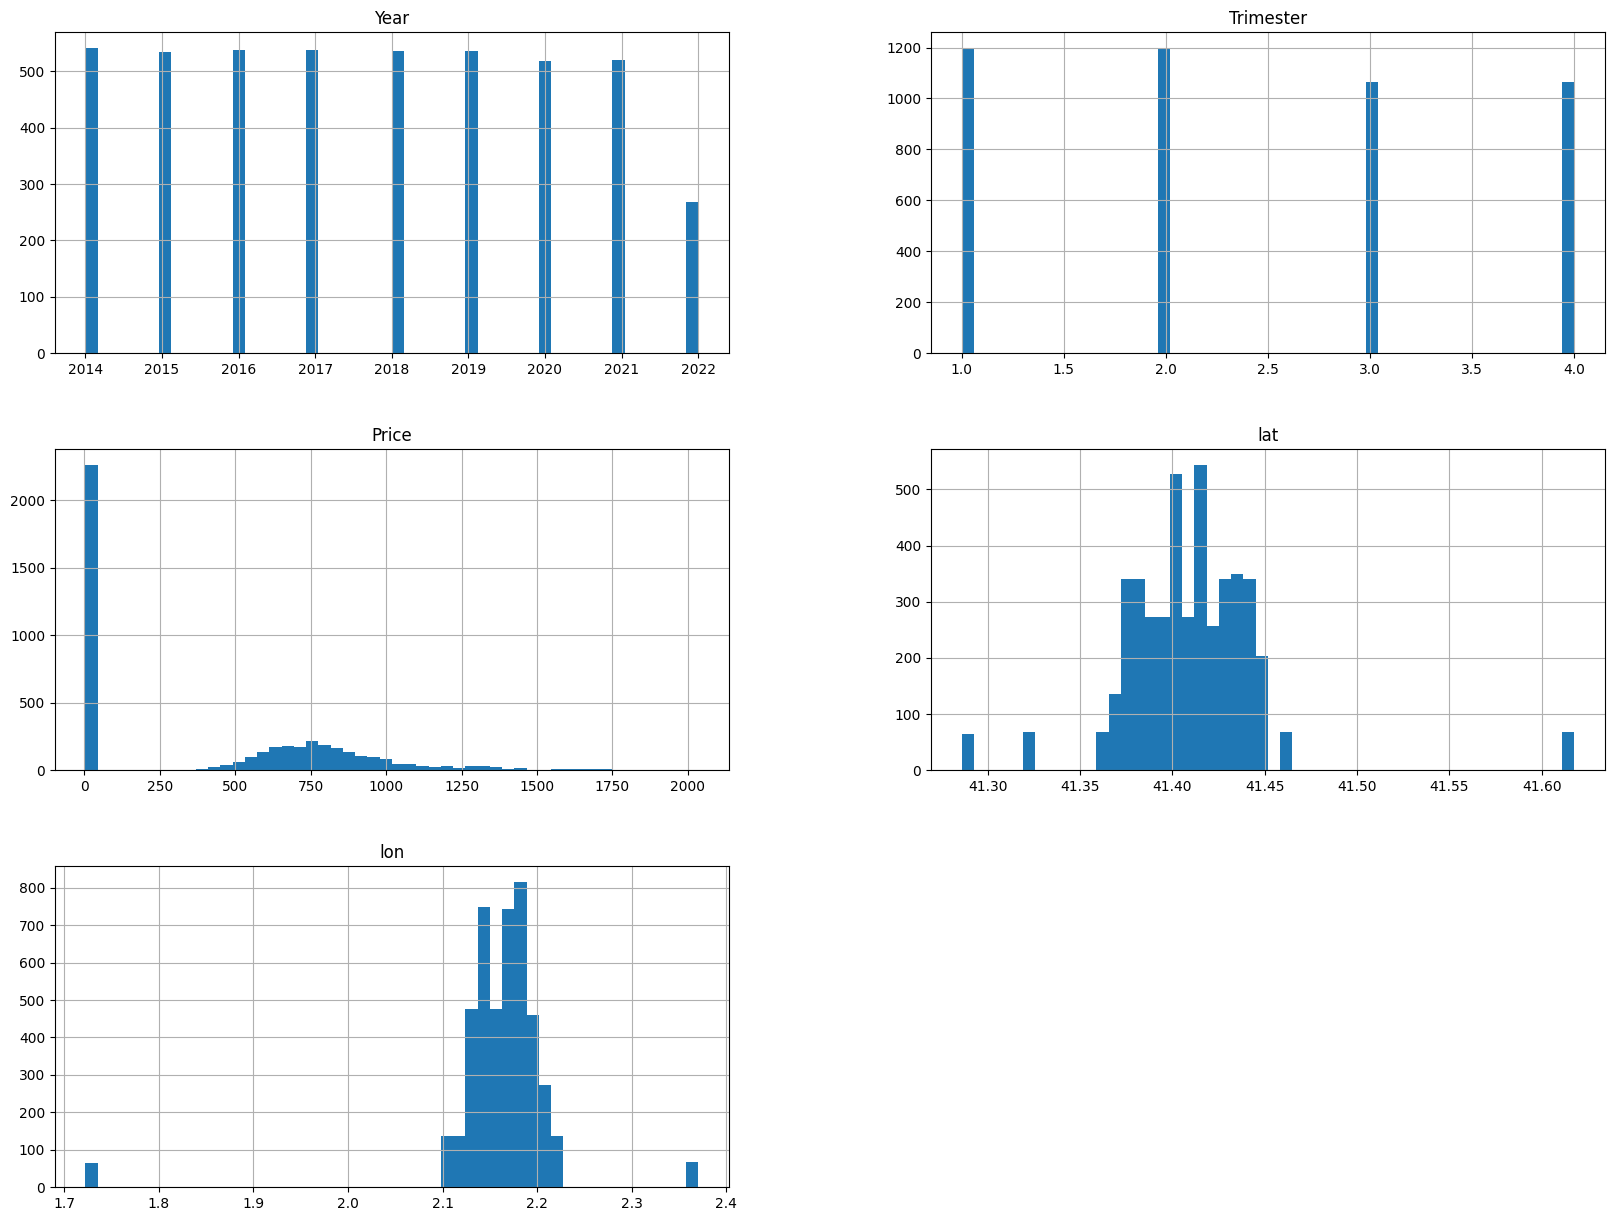

In [9]:
df_final.hist (bins= 50, figsize= (20,15))

Visualizamos sobre Mapa dispersion

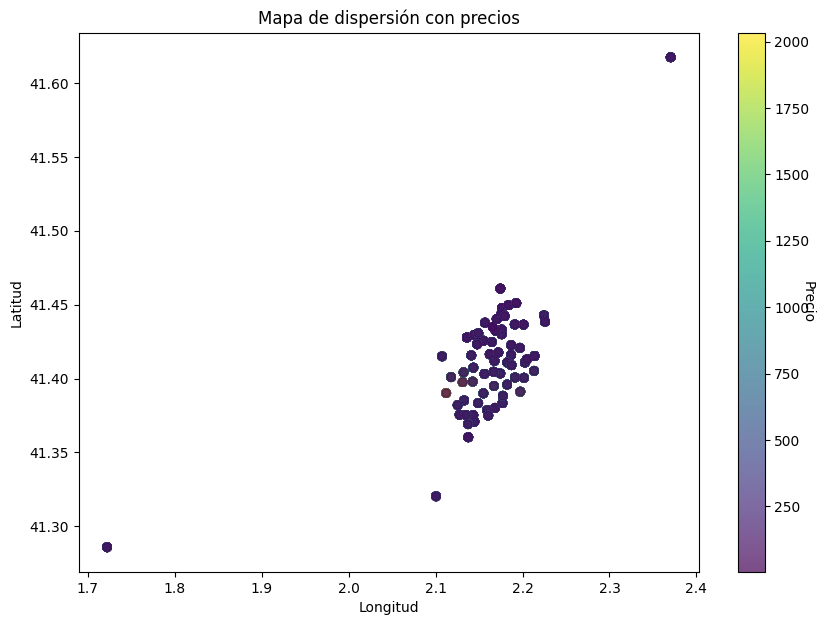

In [11]:
# Crear el gráfico de dispersión
fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(x=df_final['lon'], y=df_final['lat'], c=df_final['Price'], alpha=0.7)

# Agregar la barra de colores
cbar = plt.colorbar(scatter)
cbar.ax.set_ylabel('Precio', rotation=270)

# Establecer las etiquetas de los ejes y el título del gráfico
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Mapa de dispersión con precios')

# Mostrar el gráfico
plt.show()

In [16]:
import folium

# Crear un objeto Map de Folium y establecer su ubicación inicial y nivel de zoom
coordenadas_centro = [41.40372082670373, 2.173145613468125]
mapa = folium.Map(location=coordenadas_centro, zoom_start=12)

# Agregar el gráfico de dispersión con precios
for lat, lon, precio in zip(df_final['lat'], df_final['lon'], df_final['Price']):
    folium.CircleMarker([lat, lon], radius=precio*0.01, color='blue', fill=True, fill_color='blue', fill_opacity=0.1).add_to(mapa)

# Mostrar el mapa de Folium
display(mapa)


In [45]:
#grafica dispersion con coodenadas de barrios
df_final.plot (kind= 'scatter', x= 'lon', y= 'lat', alpha= 0.1, figsize= (10, 7),
                c= 'Price', cmap= plt.get_cmap() colorbar=True])
# s= df_final['population'/100,

SyntaxError: ignored

filtramos y limpiamos el DataSet para el cálculo del precio 2023/2024

Creamos una red neuronal

In [ ]:
# Crear un modelo secuencial
model = keras.Sequential()

# Agregar una capa oculta con 64 neuronas y función de activación ReLU
model.add(keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)))

# Agregar una capa de salida con una neurona y función de activación sigmoide
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Imprimir el resumen del modelo
model.summary()

Compilamos el modelo antes de entrenar

In [ ]:
# Compilar el modelo con la función de pérdida binary_crossentropy y el optimizador adam
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Entrenamos la red neuronal

In [ ]:
print("Empieza entrenamiento..")

# Entrenar el modelo durante 10 épocas
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

print("Modelo entrenado")

evaluamos la precision

In [ ]:
# Evaluar el modelo en el conjunto de pruebas
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Loss en el conjunto de pruebas: {test_loss:.4f}")
print(f"Accuracy en el conjunto de pruebas: {test_accuracy:.4f}")

Mostramos resultados de la predicción y añadimos porcentaje de diferencia 2022

Fin del proyecto 04 Machine Learning Casas